In [2]:
import pandas as pd
import numpy as np
titanic=pd.read_csv("train.csv")

In [3]:
titanic  # Here target attribute is Survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Performing Data Cleaning and Analysis
Understanding meaning of each column: Data Dictionary: Variable Description :
Survived - Survived (1) or died (0) Pclass - Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd) Name - Passenger’s name Sex - Passenger’s sex Age - Passenger’s age SibSp - Number of siblings/spouses aboard Parch - Number of parents/children aboard (Some children travelled only with a nanny, therefore parch=0 for them.) Ticket - Ticket number, Fare - Fare, Cabin - Cabin, Embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [5]:
#Name column can never decide survival of a person, hence we can safely delete it
del titanic["Name"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
del titanic["Ticket"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
del titanic["Fare"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S


In [11]:
del titanic["Cabin"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [14]:
# Changing Value for "Male, Female" string values to numeric values , male=1 and female=2
def getNumber(str):
    if str =="male":
        return 1
    else:
        return 2
titanic["Gender"]=titanic["Sex"].apply(getNumber)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,2
2,3,1,3,female,26.0,0,0,S,2
3,4,1,1,female,35.0,1,0,S,2
4,5,0,3,male,35.0,0,0,S,1


In [15]:
del titanic["Sex"]
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,2
2,3,1,3,26.0,0,0,S,2
3,4,1,1,35.0,1,0,S,2
4,5,0,3,35.0,0,0,S,1


In [17]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

Fill the null values of the Age column. Fill mean Survived age(mean age of the survived people) in the column where the person has survived and mean not Survived age (mean age of the people who have not survived) in the column where person has not survived

In [19]:
meanS= titanic[titanic.Survived==1].Age.mean()
meanS

28.343689655172415

Creating a new "Age" column , filling values in it with a condition if goes True then given values (here meanS) is put in place of last values else nothing happens, simply the values are copied from the "Age" column of the dataset

In [21]:
titanic["age"]=np.where(pd.isnull(titanic.Age) & titanic["Survived"]==1  ,meanS , titanic["Age"])
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [22]:
# Finding the mean age of "Not Survived" people
meanNS=titanic[titanic.Survived==0].Age.mean()
meanNS

30.62617924528302

In [23]:
titanic.age.fillna(meanNS,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [24]:
del titanic['Age']
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


We want to check if "Embarked" column is is important for analysis or not, that is whether survival of the person depends on the Embarked column value or not

In [25]:
# Finding the number of people who have survived 
# given that they have embarked or boarded from a particular port

survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

30
93
217


C:\Users\HP\AppData\Local\Temp\ipykernel_536\1434170922.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_536\1434170922.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_536\1434170922.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]


In [26]:
survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

47
75
427


C:\Users\HP\AppData\Local\Temp\ipykernel_536\3240960939.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].shape[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_536\3240960939.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].shape[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_536\3240960939.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].shape[0]


As there are significant changes in the survival rate based on which port the passengers aboard the ship. We cannot delete the whole embarked column(It is useful). Now the Embarked column has some null values in it and hence we can safely say that deleting some rows from total rows will not affect the result. So rather than trying to fill those null values with some vales. We can simply remove them.

In [27]:
titanic.dropna(inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [28]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Embarked       0
Gender         0
age            0
dtype: int64

In [30]:
#Renaming "age" and "gender" columns
titanic.rename(columns={"age":"Age"}, inplace =True)
titanic.rename(columns={"Gender":"Sex"}, inplace =True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [31]:
def getEmb(str):
    if str=="S":
        return 1
    elif str=='Q':
        return 2
    else:
        return 3
titanic["Embark"]=titanic["Embarked"].apply(getEmb)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age,Embark
0,1,0,3,1,0,S,1,22.0,1
1,2,1,1,1,0,C,2,38.0,3
2,3,1,3,0,0,S,2,26.0,1
3,4,1,1,1,0,S,2,35.0,1
4,5,0,3,0,0,S,1,35.0,1


In [32]:
del titanic["Embarked"]
titanic.rename(columns={"Embark":"Embarked"}, inplace =True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex,Age,Embarked
0,1,0,3,1,0,1,22.0,1
1,2,1,1,1,0,2,38.0,3
2,3,1,3,0,0,2,26.0,1
3,4,1,1,1,0,2,35.0,1
4,5,0,3,0,0,1,35.0,1


577
312


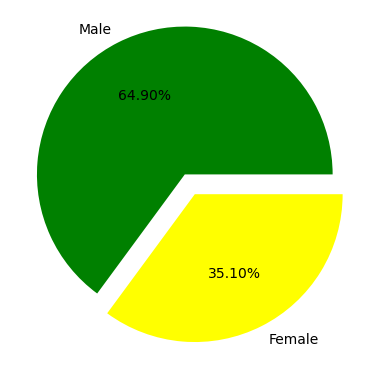

In [48]:
import matplotlib.pyplot as plt
from matplotlib import style
males=(titanic['Sex']==1).sum()
females=(titanic['Sex']==2).sum()
print(males)
print(females)
p=[males,females]
plt.pie(p,labels=["Male","Female"], colors=["Green","Yellow"], explode = (0.15, 0),autopct="%.2f%%") 
plt.show()

In [45]:
MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
print(MaleS)
MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
print(MaleN)
FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
print(FemaleS)
FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]
print(FemaleN)

109
468
231
81


C:\Users\HP\AppData\Local\Temp\ipykernel_536\1193566603.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_536\1193566603.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_536\1193566603.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_536\1193566603.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]


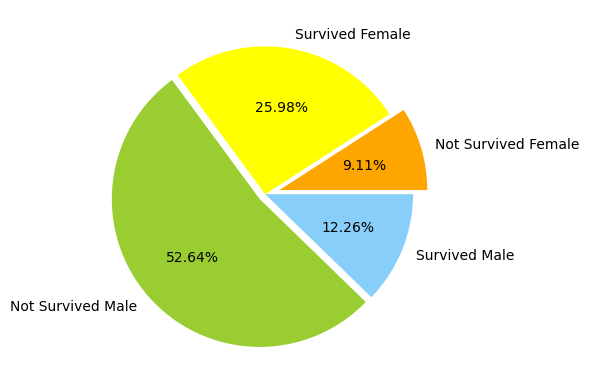

In [50]:
chart=[MaleS,MaleN,FemaleS,FemaleN]
colors=['lightskyblue','yellowgreen','Yellow','Orange']
labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]
explode=[0,0.05,0,0.1]
plt.pie(chart,labels=labels,colors=colors,explode=explode, autopct="%.2f%%",counterclock=False)
plt.show()